# Would you become a data scientist?
## by Mariangela Bonghi

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I started studiyng in the marvellous world of data one year ago. The more I learn and the more I found to be studied. If you want to become a data scientist you can find yourself overwhelmed by the number of tools and concepts and you maybe wonder yourself what are the skill most required or, what is the salary expectation or what kind of indutry has the higher demands of data scientist. I tried to answer all of this questions analizing a very interesting dataset [1] created by [picklesueat](https://github.com/picklesueat/data_jobs_data) that contains more than 3900 job listing for data scientist positions, with features such as:

- Salary Estimate
- Location
- Company Rating
- Job Description
- and more.

So, let's start this investigation!



### Import statements for the packages that are going to be used

In [304]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In this section we load the data and see the general structure of the dataset. If necessary, we will take some actions on the data in order to prepare them for the analisys.


### General Properties

In [305]:
# Read dataset
df=pd.read_csv('DataScientist.csv')
df.head(1)

,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1


In [306]:
#number of samples and number of columns
df.shape

(3909, 17)

In [307]:
#check for duplicated columns in the dataset: there are no duplicates in the dataset
df.duplicated().sum()

0

In [308]:
#General information about data: there are no missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3909 non-null   int64  
 1   index              3909 non-null   int64  
 2   Job Title          3909 non-null   object 
 3   Salary Estimate    3909 non-null   object 
 4   Job Description    3909 non-null   object 
 5   Rating             3909 non-null   float64
 6   Company Name       3909 non-null   object 
 7   Location           3909 non-null   object 
 8   Headquarters       3909 non-null   object 
 9   Size               3909 non-null   object 
 10  Founded            3909 non-null   int64  
 11  Type of ownership  3909 non-null   object 
 12  Industry           3909 non-null   object 
 13  Sector             3909 non-null   object 
 14  Revenue            3909 non-null   object 
 15  Competitors        3909 non-null   object 
 16  Easy Apply         3909 

In the dataset there are 17 columns and 3909 rows and no duplicates are present.

In [309]:
df.columns

Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')

We make a copy of the dataset and we drop all the columns that we are not going to use. In addition we rename the columns that we are going to use removing space and using lowercase

In [310]:
df_copy=df

In [311]:
df_copy.columns=df_copy.columns.str.lower()

In [312]:
df_copy.columns

Index(['unnamed: 0', 'index', 'job title', 'salary estimate',
       'job description', 'rating', 'company name', 'location', 'headquarters',
       'size', 'founded', 'type of ownership', 'industry', 'sector', 'revenue',
       'competitors', 'easy apply'],
      dtype='object')

In [313]:
df_copy.drop(['unnamed: 0','index','job title','company name','headquarters','founded','type of ownership','competitors',
         'easy apply'], axis=1, inplace=True)

In [316]:
df_copy = df_copy.rename(columns={'salary estimate': 'salary_estimate'});
df_copy = df_copy.rename(columns={'job description': 'job_description'});

In [317]:
#datatypes of columns
df_copy.dtypes

salary_estimate     object
job_description     object
rating             float64
location            object
size                object
industry            object
sector              object
revenue             object
dtype: object

In [319]:
#datatypes of "object" columns
type(df_copy['salary_estimate'][0]),\
type(df_copy['job_description'][0]),\
type(df_copy['location'][0]),\
type(df_copy['size'][0]),\
type(df_copy['industry'][0]),\
type(df_copy['sector'][0]),\
type(df_copy['revenue'][0])

(str, str, str, str, str, str, str)

In [320]:
#exploring values in some columns of the dataset
df_copy['salary_estimate'].value_counts()

$93K-$151K (Glassdoor est.)         62
$113K-$180K (Glassdoor est.)        61
$71K-$122K (Glassdoor est.)         60
$111K-$175K (Glassdoor est.)        60
$119K-$147K (Glassdoor est.)        44
                                    ..
$39K-$71K (Glassdoor est.)           7
$99K-$173K (Glassdoor est.)          6
$10-$26 Per Hour(Glassdoor est.)     3
$146K-$175K (Glassdoor est.)         3
$41K-$74K (Glassdoor est.)           1
Name: salary_estimate, Length: 148, dtype: int64

Let's clean this data adding two columns: minimum and maximum salary. In order to do this we split the values in two columns and we remove the charachters. In addition we see some values that are expressed in salary per hour. We assume that we work 8 hours per days, 20 days per months and 12 months per year and transform that data in an annula salary.

In [321]:
df_copy[df_copy['salary_estimate'].str.contains("(Employer est.)")].salary_estimate.value_counts()

/Users/Arirammstein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


$82K-$129K(Employer est.)     30
$200K-$250K(Employer est.)    29
Name: salary_estimate, dtype: int64

In [322]:
df_copy[df_copy['salary_estimate'].str.contains("Hour")].salary_estimate.value_counts()

$17-$27 Per Hour(Glassdoor est.)    11
$34-$53 Per Hour(Glassdoor est.)     7
$10-$26 Per Hour(Glassdoor est.)     3
Name: salary_estimate, dtype: int64

17 * 8hours * 20days * 12months = 32640  
27 * 8hours * 20days * 12months = 51840  
We replace "$17-$27 Per Hour(Glassdoor est.)" with "$32640-$51840"  
34 * 8hours * 20days * 12months = 65280  
53 * 8hours * 20days * 12months = 101760  
We replace "$34-$53 Per Hour(Glassdoor est.)" with "$65280-$101760"  
10 * 8hours * 20days * 12months = 19200  
26 * 8hours * 20days * 12months = 49920  
We replace "$10-$26 Per Hour(Glassdoor est.)" with "$19200-$49920"  

In [323]:
df_copy['salary_estimate'] = df_copy['salary_estimate'].str.replace('$17-$27 Per Hour(Glassdoor est.)','32640-51840',regex=False);
df_copy['salary_estimate'] = df_copy['salary_estimate'].str.replace('$34-$53 Per Hour(Glassdoor est.)','65280-101760',regex=False);
df_copy['salary_estimate'] = df_copy['salary_estimate'].str.replace('$10-$26 Per Hour(Glassdoor est.)','19200-49920',regex=False)

In [324]:
df_copy['salary_estimate'] = df_copy['salary_estimate'].str.replace('(Glassdoor est.)','',regex=False);
df_copy['salary_estimate'] = df_copy['salary_estimate'].str.replace('$','',regex=False);
df_copy['salary_estimate'] = df_copy['salary_estimate'].str.replace('K','000',regex=False);
df_copy['salary_estimate'] = df_copy['salary_estimate'].str.replace('(Employer est.)','',regex=False);

In [325]:
df_copy[['salary_min','salary_max']] = df_copy.salary_estimate.str.split("-",expand=True,)

In [326]:
df_copy.drop(['salary_estimate'], axis=1, inplace=True)

In [327]:
df_copy.salary_min.value_counts()

46000     149
39000     127
55000     124
74000     120
93000     101
         ... 
32640      11
66000       9
65280       7
19200       3
146000      3
Name: salary_min, Length: 83, dtype: int64

In [328]:
# convert just columns "a" and "b"
df_copy[["salary_min", "salary_max"]] = df_copy[["salary_min", "salary_max"]].apply(pd.to_numeric)

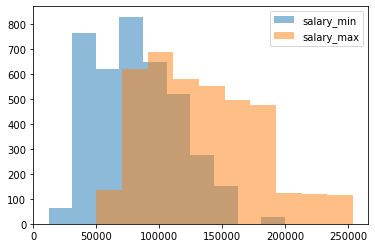

In [329]:
num_bins= 10
plt.hist(df_copy['salary_min'], num_bins, label='salary_min', alpha=0.5);
plt.hist(df_copy['salary_max'], num_bins, label='salary_max', alpha=0.5);
plt.legend(loc='upper right')
plt.show()

In [330]:
df_copy['job_description'] = df_copy['job_description'].str.upper()

In [331]:
#explore skill LOOKER/TABLEAU SQL/PYTHON/R/EXCEL/JULIA/SCALA/MATLAB  DEGREE(YES/NO) 

In [332]:
df_copy['job_description'] = df_copy['job_description'].str.replace(' R ','ERRE',regex=False);
df_copy['job_description'] = df_copy['job_description'].str.replace('/R','ERRE',regex=False);
df_copy['job_description'] = df_copy['job_description'].str.replace('R/','ERRE',regex=False);
df_copy['job_description'] = df_copy['job_description'].str.replace('(R','ERRE',regex=False);
df_copy['job_description'] = df_copy['job_description'].str.replace('R)','ERRE',regex=False);

In [333]:
skill =['LOOKER','TABLEAU','SQL','PYTHON','EXCEL','JULIA','SCALA','MATLAB','DEGREE']

In [334]:
for s in skill:
    df_copy[s] = df_copy['job_description'].map(lambda x: 1 if s in str(x) else 0);
df_copy['R'] = df_copy['job_description'].map(lambda x: 1 if 'ERRE'  in str(x) else 0);

In [335]:
df_copy.columns

Index(['job_description', 'rating', 'location', 'size', 'industry', 'sector',
       'revenue', 'salary_min', 'salary_max', 'LOOKER', 'TABLEAU', 'SQL',
       'PYTHON', 'EXCEL', 'JULIA', 'SCALA', 'MATLAB', 'DEGREE', 'R'],
      dtype='object')

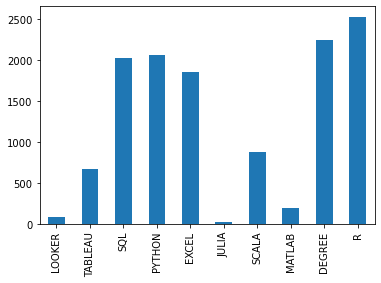

In [336]:
df_copy[['LOOKER','TABLEAU','SQL', 'PYTHON', 'EXCEL', 'JULIA', 'SCALA', 'MATLAB',
       'DEGREE', 'R']].sum().plot.bar()

plt.show()

In [339]:
df_copy[['to_drop','location']] = df_copy.location.str.split(",",expand=True,)

In [340]:
df_copy.drop(['to_drop'], axis=1, inplace=True)

In [343]:
df_copy.location.value_counts()

 Texas             1253
 California        1069
 Illinois           363
 Pennsylvania       324
 New York           313
 Arizona            295
 Ohio               177
 Florida             69
 New Jersey          32
 Delaware            10
 United Kingdom       4
Name: location, dtype: int64

In [342]:
df_copy['location'] = df_copy['location'].str.replace('TX','Texas',regex=False);
df_copy['location'] = df_copy['location'].str.replace('CA','California',regex=False);
df_copy['location'] = df_copy['location'].str.replace('IL','Illinois',regex=False);
df_copy['location'] = df_copy['location'].str.replace('PA','Pennsylvania',regex=False);
df_copy['location'] = df_copy['location'].str.replace('NY','New York',regex=False);
df_copy['location'] = df_copy['location'].str.replace('AZ','Arizona',regex=False);
df_copy['location'] = df_copy['location'].str.replace('OH','Ohio',regex=False);
df_copy['location'] = df_copy['location'].str.replace('FL','Florida',regex=False);
df_copy['location'] = df_copy['location'].str.replace('NJ','New Jersey',regex=False);
df_copy['location'] = df_copy['location'].str.replace('DE','Delaware',regex=False);

<AxesSubplot:>

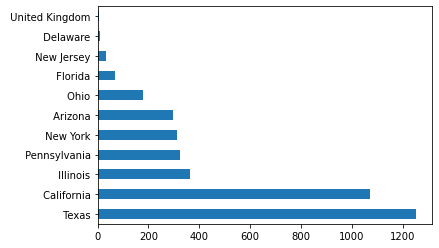

In [381]:
df_copy['location'].value_counts().plot.barh()

In [348]:
df_copy['size'].value_counts()

10000+ employees           993
51 to 200 employees        563
1001 to 5000 employees     553
1 to 50 employees          550
201 to 500 employees       418
501 to 1000 employees      307
Unknown                    306
5001 to 10000 employees    219
Name: size, dtype: int64

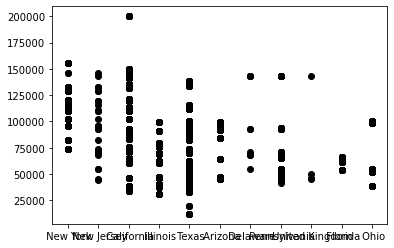

In [384]:
plt.plot(df_copy['location'], df_copy['salary_min'], 'o', color='black');


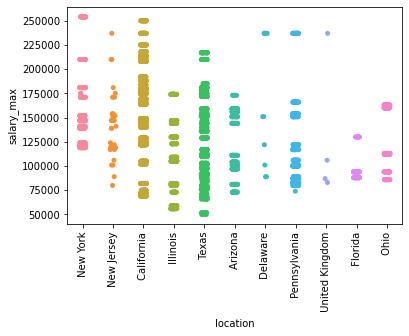

In [393]:
ax=sns.stripplot(x=df_copy['location'], y=df_copy['salary_max'], data=df_copy)
ax.tick_params(axis='x', rotation=90)

In [347]:
df_copy['size'] = df_copy['size'].str.replace('-1','Unknown',regex=False);

In [349]:
df_copy['revenue'].value_counts()

Unknown / Non-Applicable            1163
$10+ billion (USD)                   599
$100 to $500 million (USD)           338
-1                                   229
$50 to $100 million (USD)            214
$2 to $5 billion (USD)               211
$10 to $25 million (USD)             191
$1 to $2 billion (USD)               180
$1 to $5 million (USD)               170
$25 to $50 million (USD)             143
$5 to $10 billion (USD)              133
Less than $1 million (USD)           124
$500 million to $1 billion (USD)     114
$5 to $10 million (USD)              100
Name: revenue, dtype: int64

<AxesSubplot:>

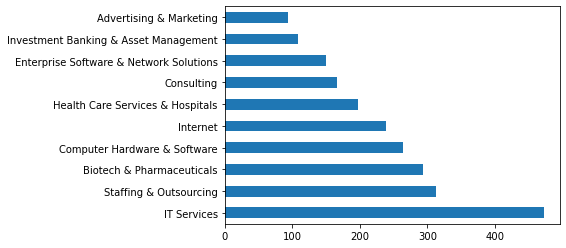

In [375]:
df_copy[df_copy['industry']!='-1']['industry'].value_counts()[:10].plot.barh()

In [400]:
data_pivoted = df_copy.pivot(df_copy['rating'],df_copy['salary_max'])
ax = sns.heatmap(data_pivoted)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().